Key classification metrics:

1) Accuracy: Accuracy in classification problems is the number of correct predictions made by the model divided by the total number of predictions. Accuracy is useful when our target classes are well **balanced**, does not perform well on **unbalanced** datasets. 

For those scenarios we'll want to understand **recall** and **precision**

2) Recall:  the ability of a machine learning model to find all the relevant cases within a data set.
And the actual mathematical formula for definition of recall is going to be the number of true positives, divided by the number of true positives plus the number of false negatives.

3) Precision:  is the ability of a classification model to identify **only** the relevant data points.
Precision is defined as a number of true positives divided by the number of true positives plus the number of false positives.

Trade off between recall and precision. 
While recall expresses the ability to find all relevant instances in a data set, precision expresses the proportion of the data points
our model says was relevant, that actually were relevant.

4) F1-Score: A combination of precision and recall. In cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using what is called the F1 score. The F1 score is the **harmonic mean** of precision and recall taking both metrics into account in the following equation. F1 = 2*((precision*recall) / (precision+recall)). the reason we use the harmonic mean instead of a simple average is because it punishes extreme values.

Confusion Matrix: A way to view various metrics of classification is the **confusion matrix**



In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("TextFiles\\smsspamcollection.tsv", sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
print(f"Number of rows: {len(df)}")

Number of rows: 5572


In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

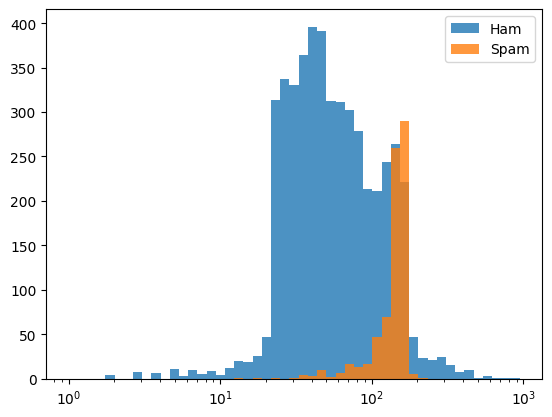

In [9]:
import matplotlib.pyplot as plt

plt.xscale("log")
bins =  1.15**(np.arange(0,50))
plt.hist(df[df['label'] == "ham"]['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == "spam"]['length'], bins=bins, alpha=0.8)
plt.legend(("Ham", "Spam"))
plt.show()

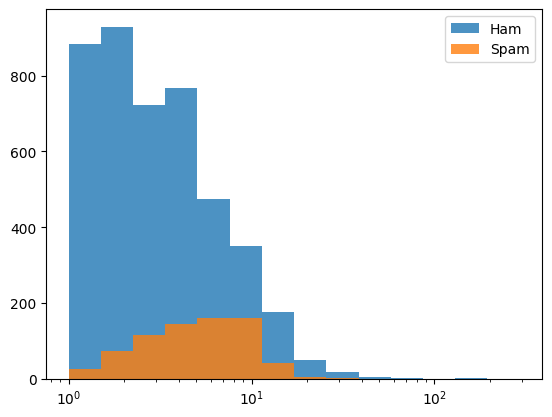

In [12]:
plt.xscale("log")
bins =  1.5**(np.arange(0,15))
plt.hist(df[df['label'] == "ham"]['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == "spam"]['punct'], bins=bins, alpha=0.8)
plt.legend(("Ham", "Spam"))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
# Feature data
X = df[["length", "punct"]]
# y is our label
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(3900, 2)

In [18]:
X_test.shape

(1672, 2)

In [19]:
y_test.shape

(1672,)

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="lbfgs")
lr_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
from sklearn import metrics

In [26]:
preds = lr_model.predict(X_test)
preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
# True values
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [28]:
metrics.confusion_matrix(y_test,preds)

array([[1404,   44],
       [ 219,    5]], dtype=int64)

In [29]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, preds), index=["Ham", "Spam"],
                  columns=["Ham", "Spam"])
df

,Ham,Spam
Ham,1404,44
Spam,219,5


In [31]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
print(metrics.accuracy_score(y_test, preds)*100)

84.27033492822966


In [34]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

[[1438   10]
 [ 224    0]]
0.8600478468899522


In [35]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [37]:
from sklearn.svm import SVC

In [36]:
svc_model = SVC(gamma="auto")

svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, svc_preds))
print(metrics.accuracy_score(y_test, svc_preds))
print(metrics.classification_report(y_test,svc_preds))

[[1373   75]
 [ 121  103]]
0.8827751196172249
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



Text Feature Extraction from text

A very large set of documents, otherwise known as a corpus we're gonna have what's known as a very sparse matrix,
a matrix of a lot of zeros. This sort of matrix is known as the document term matrix, or DTM.

In [ ]:
# Count Vectorization:  count the occurrences of all the unique words.
"""
we're just counting the number of times each unique word throughout the entire vocabulary of all the documents
shows up in each particular document.
"""

an alternative to count vectorization is something called **TF-IDF vectorizer**, or term frequency inverse document frequency vectorizer.

This also going to create a document term matrix from our messages. However, instead of filling in the document term matrix,
or DTM, with token counts, it calculates term frequency inverse document frequency value for each word.

TF - raw count of a term in a document. I.e number of times that term occurs in a document.

TF-IDF = term frequency * (1/ document frequency)
TF-IDF = term frequency * inverse frequency

TF-IDF allows us to understand the context of words across an entire corpus of documents instead of just its relative importance
in a single document.

In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv("TextFiles\\smsspamcollection.tsv", sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [40]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [41]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df['message']
y = df['label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [45]:
# perform countvectorization
#  text pre-processing, tokenizing, and the ability to filter out stop words are all included in count vectorizer
# which builds a dictionary of features and transforms documents to feature vectors.

from sklearn.feature_extraction.text import CountVectorizer

In [46]:
count_vect = CountVectorizer()

In [47]:
# Fit vectorizer to data (builds a vocab, count number of words...)
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)

# Transform the original Text Message --> VECTOR
X_train_counts = count_vect.fit_transform(X_train)

In [48]:
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [49]:
X_train.shape

(3733,)

In [50]:
X_train_counts.shape

(3733, 7082)

In [51]:
# transform the counts to frequencies with TF-IDF.
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer()

In [54]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [55]:
# Since its common to perform Count Vectorization and TFIDF transformation sklearn
# combines the two previous steps of Count Vectorization and TFIDF transformation into one single step.
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf_vect = TfidfVectorizer()

In [57]:
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(3733, 7082)

In [58]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train_tfidf, y_train)

LinearSVC()

instead of having to do this sort of fit transform and count vectorization on your test data

in order to call predict what we can do is actually combine everything we just saw into one single pipeline step.

In [59]:
from sklearn.pipeline import Pipeline

In [61]:
text_clf = Pipeline([("tfidf",TfidfVectorizer()),
                     ("clf",LinearSVC())])

In [62]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [63]:
predictions = text_clf.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1586    7]
 [  12  234]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.989668297988037


In [66]:
# predicting on new messages

text_clf.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [67]:
text_clf.predict(["Congratulations you've been selected as a Winner, Text WON to 12345 for free entry?"])

array(['spam'], dtype=object)